In [43]:
### IMPORTS
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [44]:
### FUNCTIONS

def partition_by_criteria(data,criteria):
    criteria_groups = data.groupby(criteria)   # Group the dataframe by subject_id

    # Create a dictionary of dataframes, one for each value in the criteria column
    partitions = {criteria: criteria_groups.get_group(criteria) for criteria in criteria_groups.groups}
    
    # Return the dictionary of partitions
    return partitions



In [45]:
#INSTANCIATIONS & READING DATA & PREPROCESSING


## READING TEST DATA ###

subject_id_test = pd.read_csv('Test/subject_id_test.txt')               #test subject
subject_id_test.columns = (['subject_id'])

test_data = pd.read_csv('Test/X_test.txt',delimiter=' ')                #test data
test_data.columns = (['feature_' + str(i) for i in range(1, 562)])

test_labels = pd.read_csv('Test/y_test.txt')                            #test labels
test_labels.columns = (['labels'])

## reading training data
subject_id_train = pd.read_csv('Train/subject_id_train.txt')            #training subject
subject_id_train.columns = (['subject_id'])

train_data = pd.read_csv('Train/X_train.txt',delimiter=' ')             #training data
train_data.columns = (['feature_' + str(i) for i in range(1, 562)])

train_labels = pd.read_csv('Train/y_train.txt')                         #training labels
train_labels.columns = (['labels'])


train_data.head(10)

entire_data = pd.concat([subject_id_train,train_data,train_labels], axis=1)
entire_data.head(-100)

# train_data.describe()

,subject_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_553,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,labels
0,1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
1,1,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
2,1,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
3,1,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5
4,1,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,...,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,30,0.054294,-0.032269,0.012414,-0.910952,-0.725852,-0.771337,-0.916010,-0.747212,-0.823147,...,0.158913,-0.214697,0.098350,-0.524833,-0.471540,0.821657,0.579347,-0.581637,-0.413019,6
7662,30,0.030294,-0.028079,0.022530,-0.962844,-0.888282,-0.918805,-0.966258,-0.912107,-0.936017,...,0.250453,-0.152556,-0.036655,-0.186934,0.243188,-0.305186,0.568226,-0.566983,-0.427896,6
7663,30,0.029501,-0.012101,-0.004080,-0.956501,-0.978341,-0.961287,-0.970399,-0.981236,-0.966541,...,-0.007578,-0.445108,-0.043157,0.211973,0.452150,0.156756,0.571964,-0.548194,-0.447409,6
7664,30,0.054970,-0.001837,-0.026623,-0.956123,-0.974264,-0.973684,-0.962335,-0.973673,-0.978821,...,-0.114261,-0.530907,0.134805,0.139915,0.555531,-0.378190,0.576002,-0.541304,-0.454615,6


In [46]:
## DATA MANIPULATIONS


## APPLY PCA with 3 features
n_comp = 3
pca = PCA(n_components=n_comp)
train_data_pca = pd.DataFrame(pca.fit_transform(train_data))
train_data_pca.columns = ['pca_feature_' + str(x) for x in range(n_comp)]


# components = pca.components_
# explained_variance_ratio = pca.explained_variance_ratio_

print(train_data_pca)
# print(components)
# print(explained_variance_ratio)

      pca_feature_0  pca_feature_1  pca_feature_2
0         -5.415082      -0.517000      -1.711621
1         -5.368896      -1.026892      -1.836120
2         -5.556865      -1.421823      -1.469505
3         -5.619839      -1.701460      -1.515510
4         -5.593074      -1.948663      -1.350233
...             ...            ...            ...
7761       5.688713       2.145657      -0.595231
7762       5.244134       1.986552      -0.507250
7763       5.259961       2.670648      -0.554205
7764       4.816770       2.918329      -0.680036
7765       4.928907       2.107061      -1.040810

[7766 rows x 3 columns]


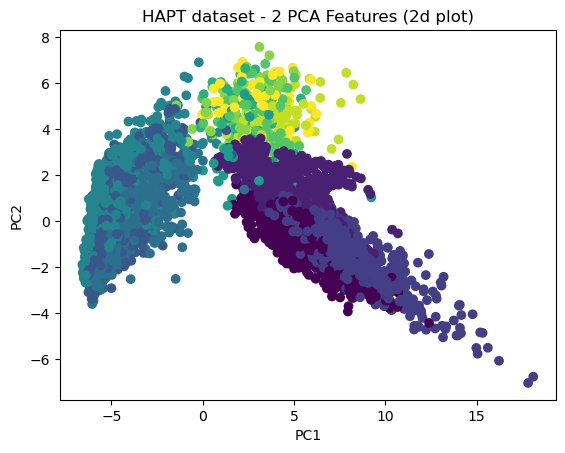

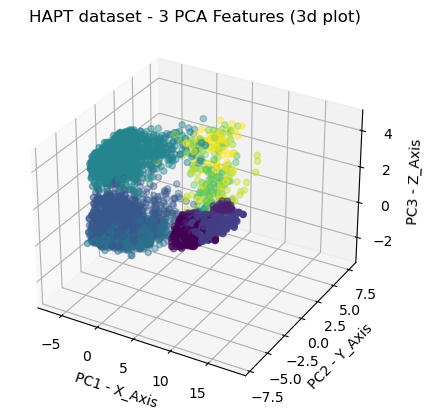

In [47]:
### RANDOM STUFF


# PLOT 1 - HAPT dataset - PCA (2d)

plot = plt.scatter(train_data_pca['pca_feature_0'],
           train_data_pca['pca_feature_1'],
           c=train_labels['labels'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('HAPT dataset - 2 PCA Features (2d plot)')




# PLOT 2 - HAPT dataset - PCA (3d scatter)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(train_data_pca['pca_feature_0'],
           train_data_pca['pca_feature_1'],
           train_data_pca['pca_feature_2'],
           c=train_labels['labels'])
ax.set_xlabel('PC1 - X_Axis')
ax.set_ylabel('PC2 - Y_Axis')
ax.set_zlabel('PC3 - Z_Axis')
ax.set_title('HAPT dataset - 3 PCA Features (3d plot)')
plt.show()



# svm train
# svm = LinearSVC()
# svm.fit(train_data_pca,train_labels)

# print(classification_report(svm.predict(pd.DataFrame(pca.transform(test_data))),test_labels))

In [48]:

### AGGREGATE DATA BY TEST SUBJECT AVERAGES ON A PARTICULAR LABEL ACTION

entire_data_pca = pd.concat([subject_id_train,train_data_pca,test_labels], axis=1)
entire_data_pca


entire_data_clean = pd.concat([subject_id_train,train_data,test_labels], axis=1).dropna()               ### remove rows with missing values
entire_data_pca_clean = pd.concat([subject_id_train,train_data_pca,test_labels], axis=1).dropna()
entire_data_pca_clean

labels_clean_partition = partition_by_criteria(entire_data_pca_clean,'labels')                                                   ### partition the data by labels



# get averages of test subjects on each activity label

def get_partition_avg_by_label(partition):                                                              ### this function returns the average of each pca feature in a partition grouped by labels
    pca1_avg = np.average(partition['pca_feature_0'])                                                   ### essentially a row. to be used where each row represents one label
    pca2_avg = np.average(partition['pca_feature_1'])
    pca3_avg = np.average(partition['pca_feature_2'])
    return pca1_avg, pca2_avg, pca3_avg


labels_clean_averages = []                                                                              ### list which will contain new values (average movement of all users for each movement type/label) to be plotted

for partition in labels_clean_partition.values():                                                       ### adding each row to the list for each label average
    partition = partition.reset_index()                                                                 ### due to the way dataframes work, the index of the partition has to be reset or else it maintains the original index of the 'labels_clean_partition'
    p1,p2,p3 = get_partition_avg_by_label(partition)
    label = partition['labels'][0]                                                                      ### 0 is an arbitrary value but a guaranteed value. every label here has the same value for 'label'
    labels_clean_averages.append([p1,p2,p3,label])

labels_clean_averages = pd.DataFrame(labels_clean_averages)                                             ### convert the list to a dataframe
labels_clean_averages.columns = (['pca_feature_0', 'pca_feature_1', 'pca_feature_2', 'labels'])          ### column names

print(labels_clean_averages)                                                                            ### checking output

    pca_feature_0  pca_feature_1  pca_feature_2  labels
0       -0.133609      -0.009588      -0.257906     1.0
1       -1.266460       0.060514       0.072758     2.0
2       -0.795465       0.356253      -0.037907     3.0
3        1.621457      -0.112011       0.103378     4.0
4        0.800518      -0.190819       0.100408     5.0
5        2.332419      -0.068484      -0.261549     6.0
6        2.169775       0.210637       0.069016     7.0
7        1.047691      -0.572041      -0.725622     8.0
8        2.612566      -0.610657       0.194924     9.0
9        0.388821      -0.226314      -0.194382    10.0
10       1.302091      -0.734597       0.500123    11.0
11      -0.128893      -1.259391      -0.329738    12.0


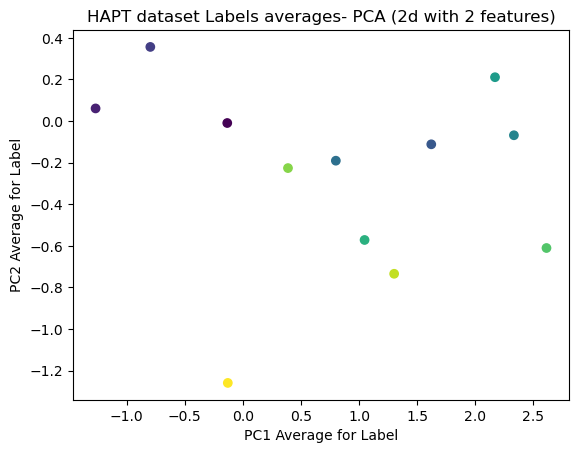

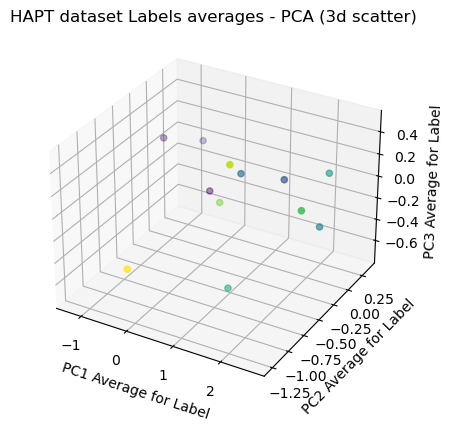

In [49]:
#### PLOTTING THE AVERAGES 


# PLOT 3 - HAPT dataset averages - PCA (2d)

plot = plt.scatter(labels_clean_averages['pca_feature_0'],
           labels_clean_averages['pca_feature_1'],
           c=labels_clean_averages['labels'])
plt.xlabel('PC1 Average for Label')
plt.ylabel('PC2 Average for Label')
plt.title('HAPT dataset Labels averages- PCA (2d with 2 features)')




# PLOT 4 - HAPT dataset - PCA (3d scatter)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(labels_clean_averages['pca_feature_0'],
           labels_clean_averages['pca_feature_1'],
           labels_clean_averages['pca_feature_2'],
           c=labels_clean_averages['labels'])
ax.set_xlabel('PC1 Average for Label')
ax.set_ylabel('PC2 Average for Label')
ax.set_zlabel('PC3 Average for Label')
ax.set_title('HAPT dataset Labels averages - PCA (3d scatter)')
plt.show()

In [50]:
### AGGREGATE DATA BY LABELS AVERAGES ON A PARTICULAR TEST SUBJECT

subjects_clean_partition = partition_by_criteria(entire_data_pca_clean,'subject_id')                                                   ### partition the data by labels



# get averages of every label on each test subject

def get_partition_avg_by_subject_id(partition):                                                             ### this function returns the average of each pca feature in a partition grouped by labels
    pca1_avg = np.average(partition['pca_feature_0'])                                                       ### essentially a row. to be used where each row represents one label
    pca2_avg = np.average(partition['pca_feature_1'])
    pca3_avg = np.average(partition['pca_feature_2'])
    return pca1_avg, pca2_avg, pca3_avg


subjects_clean_averages = []                                                                                ### list which will contain new values (average movement of all users for each movement type/label) to be plotted

for partition in subjects_clean_partition.values():                                                           ### adding each row to the list for each label average
    partition = partition.reset_index()                                                                     ### due to the way dataframes work, the index of the partition has to be reset or else it maintains the original index of the 'labels_clean_partition'
    p1,p2,p3 = get_partition_avg_by_subject_id(partition)
    label = partition['subject_id'][0]                                                                      ### 0 is an arbitrary value but a guaranteed value. every label here has the same value for 'label'
    subjects_clean_averages.append([label,p1,p2,p3])

subjects_clean_averages = pd.DataFrame(subjects_clean_averages)                                               ### convert the list to a dataframe
subjects_clean_averages.columns = (['subject_id', 'pca_feature_0', 'pca_feature_1', 'pca_feature_2'])       ### column names

print(subjects_clean_averages)                                                                                ### checking output

   subject_id  pca_feature_0  pca_feature_1  pca_feature_2
0           1       1.371135      -0.328854       0.018258
1           3       0.200872       0.067886      -0.227736
2           5       0.968381      -0.067185      -0.016759
3           6       1.596559      -0.800661       0.059571
4           7       0.737643       0.209045      -0.121950
5           8       0.905882      -0.352271       0.403011
6          11      -0.333359       0.158778      -0.182738
7          14       1.336039       0.708911      -0.128461
8          15      -0.169472       0.063912      -0.071172
9          16      -3.860917      -0.120491      -0.176612


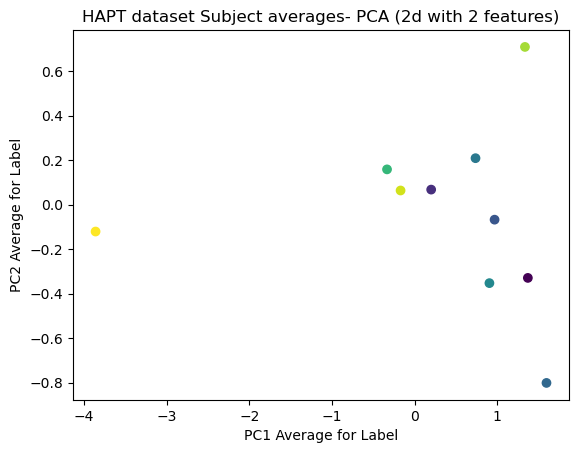

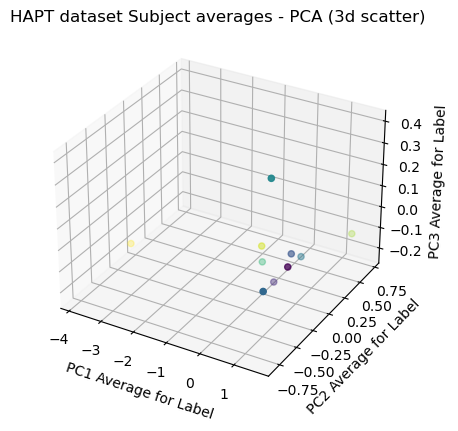

In [51]:
#### PLOTTING THE AVERAGES 


# PLOT 5 - HAPT dataset averages - PCA (2d)

plot = plt.scatter(subjects_clean_averages['pca_feature_0'],
           subjects_clean_averages['pca_feature_1'],
           c=subjects_clean_averages['subject_id'])
plt.xlabel('PC1 Average for Label')
plt.ylabel('PC2 Average for Label')
plt.title('HAPT dataset Subject averages- PCA (2d with 2 features)')




# PLOT 6 - HAPT dataset - PCA (3d scatter)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(subjects_clean_averages['pca_feature_0'],
           subjects_clean_averages['pca_feature_1'],
           subjects_clean_averages['pca_feature_2'],
           c=subjects_clean_averages['subject_id'])
ax.set_xlabel('PC1 Average for Label')
ax.set_ylabel('PC2 Average for Label')
ax.set_zlabel('PC3 Average for Label')
ax.set_title('HAPT dataset Subject averages - PCA (3d scatter)')
plt.show()

In [52]:
#### CONSIDERING THIS IS A TIME SERIES, WE WILL ATTEMPT TO PLOT A LINE CHART HERE USING A SINGLE PCA COMPONENT.
#### this plot will have a line indicating each label action (the 'labels_averages') and the x-axis will be
#### time (where each 50 records is a second)


### get all readings of each label in partitions

entire_labels_partition = partition_by_criteria(entire_data_pca,'labels')                                                   ### partition the data by labels



# get averages of every label on each test subject

entire_labels_partition_time = []                                                                                ### list which will contain new values (the partition of all records by labels) to be plotted

for partition in entire_labels_partition.values():                                                           ### adding each row to the list for each label average
    partition = partition.reset_index()                                                                     ### due to the way dataframes work, the index of the partition has to be reset or else it maintains the original index of the 'labels_clean_partition'
    partition = partition.drop(['index'], axis=1)
    partition['time'] = range(0,len(partition)*20,20) 
    label = partition['labels'][0]                                                                      ### 0 is an arbitrary value but a guaranteed value. every label here has the same value for 'label'
    entire_labels_partition_time.append(partition)


entire_labels_partition_time                                                                                ### checking output



[     subject_id  pca_feature_0  pca_feature_1  pca_feature_2  labels  time
 0             1       6.452987      -1.179131      -0.380964     1.0     0
 1             1       6.685712      -1.952410      -0.101967     1.0    20
 2             1       5.503743      -0.430450      -0.904299     1.0    40
 3             1       6.223841      -1.241108      -0.281018     1.0    60
 4             1       5.757565      -1.275531       0.049844     1.0    80
 ..          ...            ...            ...            ...     ...   ...
 491          16      -5.962963      -1.037457       2.470179     1.0  9820
 492          16      -5.845625       0.135681       2.343446     1.0  9840
 493          16      -5.537633       0.463955       2.167197     1.0  9860
 494          16      -5.535907       0.326288       2.131630     1.0  9880
 495          16      -5.919052       0.279599       2.115069     1.0  9900
 
 [496 rows x 6 columns],
      subject_id  pca_feature_0  pca_feature_1  pca_feature_2

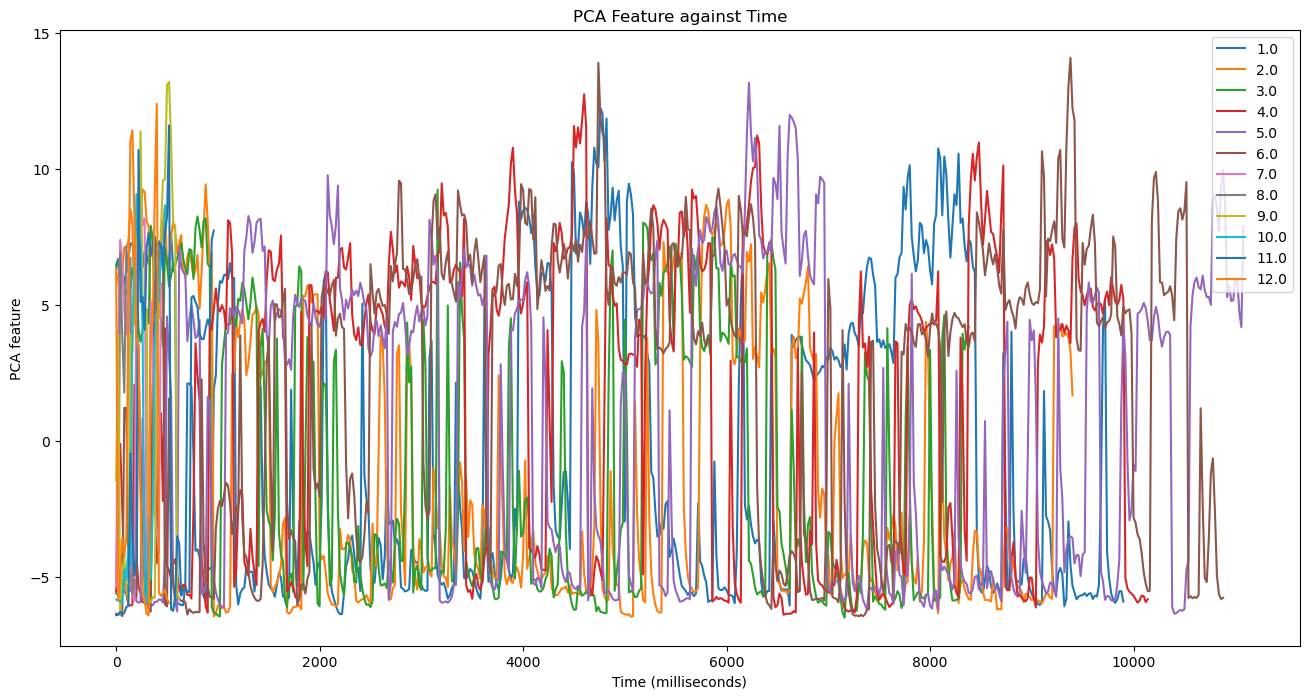

In [60]:
#### PLOTTING EACH DATAFRAME IN THE LIST 'entire_labels_partition_time' AS A LINE CHART ON THE SAME PLOT

# plotting the dataframes
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the dataframes
for partition in entire_labels_partition_time:
    ax.plot(partition['time'], partition['pca_feature_0'], label=partition['labels'][0])


# Add labels and title to the plot
plt.legend(loc='upper right')
plt.xlabel('Time (milliseconds)')
plt.ylabel('PCA feature')
plt.title('PCA Feature against Time')

# Show the plot
plt.show()

In [55]:
#### LINE PLOT TOO MESSY. MAKE IT INTERACTIVE

import plotly.graph_objs as go

# Create a plotly figure
int_fig = go.Figure()

# Add traces to the plotly figure
for i, partition in enumerate(entire_labels_partition_time):
    int_fig.add_trace(go.Scatter(x=partition['time'], y=partition['pca_feature_0'], mode='lines', name=f'Label {i+1}'))

# Update layout of the plotly figure
int_fig.update_layout(title='PCA Feature against Time',
                  xaxis_title='Time (milliseconds)',
                  yaxis_title='PCA feature')

# Show the plotly figure
int_fig.show()

In [ ]:
#### ATTEMPT TO PLOT A LINE CHART HERE USING A SINGLE PCA COMPONENT.
#### this plot will have a line indicating each label action (the 'labels_averages') and the x-axis will be
#### time (where each 50 records is a second)


### get all readings of each label in partitions

entire_labels_partition_new = partition_by_criteria(entire_data_pca,'subject_id')                                                   ### partition the data by labels



# get averages of every label on each test subject

entire_labels_partition_subjectTime = []                                                                                ### list which will contain new values (the partition of all records by labels) to be plotted

for partition in entire_labels_partition_new.values():                                                           ### adding each row to the list for each label average
    partition = partition.reset_index()                                                                     ### due to the way dataframes work, the index of the partition has to be reset or else it maintains the original index of the 'labels_clean_partition'
    partition = partition.drop(['index'], axis=1)
    partition['time'] = range(0,len(partition)*20,20) 
    label = partition['subject_id'][0]                                                                      ### 0 is an arbitrary value but a guaranteed value. every label here has the same value for 'label'
    entire_labels_partition_subjectTime.append(partition)


entire_labels_partition_subjectTime                                                                                ### checking output



[     subject_id  pca_feature_0  pca_feature_1  pca_feature_2  labels  time
 0             1      -5.415082      -0.517000      -1.711620     5.0     0
 1             1      -5.368896      -1.026892      -1.836120     5.0    20
 2             1      -5.556865      -1.421823      -1.469505     5.0    40
 3             1      -5.619839      -1.701460      -1.515511     5.0    60
 4             1      -5.593074      -1.948663      -1.350234     5.0    80
 ..          ...            ...            ...            ...     ...   ...
 362           1       4.395096       1.775436      -0.616289     5.0  7240
 363           1       4.688079       1.604917      -0.821244     5.0  7260
 364           1       4.831012       1.526522      -0.642569     5.0  7280
 365           1       4.776188       1.797128      -0.718639     5.0  7300
 366           1       4.345145       1.805338      -0.696673     5.0  7320
 
 [367 rows x 6 columns],
      subject_id  pca_feature_0  pca_feature_1  pca_feature_2

In [ ]:
#### LINE PLOT TOO MESSY. MAKE IT INTERACTIVE

import plotly.graph_objs as go

# Create a plotly figure
int_fig = go.Figure()

# Add traces to the plotly figure
for i, partition in enumerate(entire_labels_partition_subjectTime):
    int_fig.add_trace(go.Scatter(x=partition['time'], y=partition['pca_feature_0'], mode='lines', name=f'Subject {i+1}'))

# Update layout of the plotly figure
int_fig.update_layout(title='Title of the plot',
                  xaxis_title='X-axis label',
                  yaxis_title='Y-axis label')

# Show the plotly figure
int_fig.show()